In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import joblib
import seaborn as sns

In [2]:
df = pd.read_csv('final_df.csv')

#### Preprocessing

In [3]:
X = df['Review']
y = df['Dominant_topic']

In [4]:
# split data into test and training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state = 77)

#initiate vectorizer and fit
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df = 0.5)
vectorizer.fit(X_train)

#save
joblib.dump(vectorizer, './models/tfidf_vectorizer.pkl')


['./models/tfidf_vectorizer.pkl']

In [6]:
#transform to vectors
X_train_v = vectorizer.transform(X_train).toarray()
X_test_v = vectorizer.transform(X_test).toarray()

#### Model Training - RF

In [130]:
#
clf = RandomForestClassifier(
    n_estimators = 75,
    criterion = 'entropy',
    random_state = 77,
    class_weight = 'balanced',
    min_samples_split = 20,
    max_samples = 0.5
)

clf.fit(X_train_v, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_samples=0.5, min_samples_split=20, n_estimators=75,
                       random_state=77)

In [126]:
y_pred = clf.predict(X_test_v)
y_pred_train = clf.predict(X_train_v)

print(
    accuracy_score(y_train, y_pred_train),
    accuracy_score(y_test, y_pred)
)

0.9690358902181563 0.8273921200750469


In [127]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

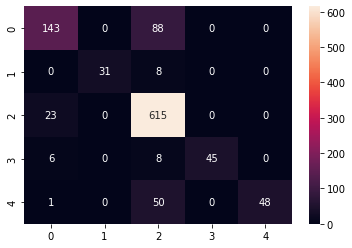

In [128]:
sns.heatmap(cm, annot=True, fmt='d')

In [129]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.62      0.71       231
           1       1.00      0.79      0.89        39
           2       0.80      0.96      0.87       638
           3       1.00      0.76      0.87        59
           4       1.00      0.48      0.65        99

    accuracy                           0.83      1066
   macro avg       0.93      0.73      0.80      1066
weighted avg       0.84      0.83      0.82      1066



#### Model Training - AdaBoost

In [136]:
clf_ada = AdaBoostClassifier(
    n_estimators = 75,
    random_state = 77,
    learning_rate = 0.8
)

clf_ada.fit(X_train_v, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=75, random_state=77)

In [137]:
y_pred = clf_ada.predict(X_test_v)
y_pred_train = clf_ada.predict(X_train_v)

print(
    accuracy_score(y_train, y_pred_train),
    accuracy_score(y_test, y_pred)
)

0.6183438892798498 0.600375234521576


#### SVM

In [7]:
svc = SVC(
    class_weight = 'balanced'
)
svc.fit(X_train_v, y_train)

SVC(class_weight='balanced')

In [8]:
y_pred = svc.predict(X_test_v)
y_pred_train = svc.predict(X_train_v)

print(
    accuracy_score(y_train, y_pred_train),
    accuracy_score(y_test, y_pred)
)

0.9861599812338728 0.8724202626641651


<AxesSubplot:>

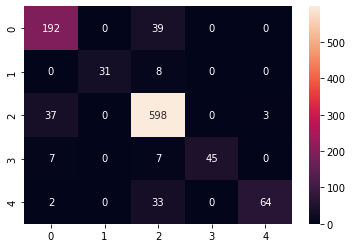

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

#### Pipeline

In [11]:
pipe = make_pipeline(vectorizer, svc)
pipe.fit(X_train, y_train)
joblib.dump(pipe, './models/pipeline.pkl')

pipeline_pred = pipe.predict(X_test)
print(f'pipeline test > accuracy against test set is {accuracy_score(y_test, pipeline_pred)}')


pipeline test > accuracy against test set is 0.8724202626641651
